In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [533]:
file_path = '/Users/viyankamoodley/Desktop/House_Price.csv'
data = pd.read_csv(file_path)

# displaying basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [535]:
# number of instances indicated by 1460 rows
# number of features indicated by 81 cols, however it should be noted that "Id" represents a data entry, so has no real sway and should be excluded, therefore data contains only 80 features
# number of object data types suggest 43 categorical features
# number of float64 and int64 data types adds up to 38 numeric features or 37 when ecluding "Id"

In [537]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [539]:
#1b
print("Pearson Correlations")
top_5_correlated_features = data.corrwith(data['SalePrice'], method='pearson', numeric_only=True).sort_values(ascending=False).head(6)
print(top_5_correlated_features[1:6]) #specificing values 1 to 6, so that SalesPrice is excluded from top 5 correlated features


Pearson Correlations
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
dtype: float64


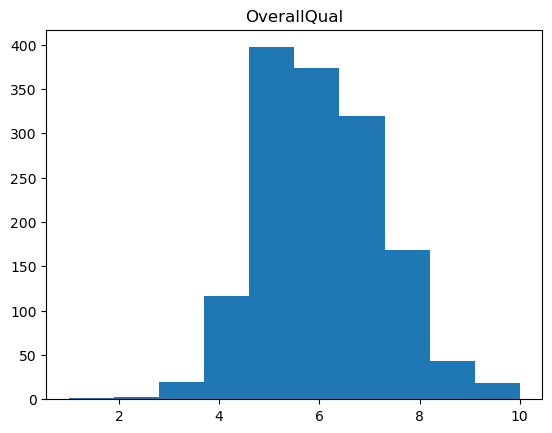

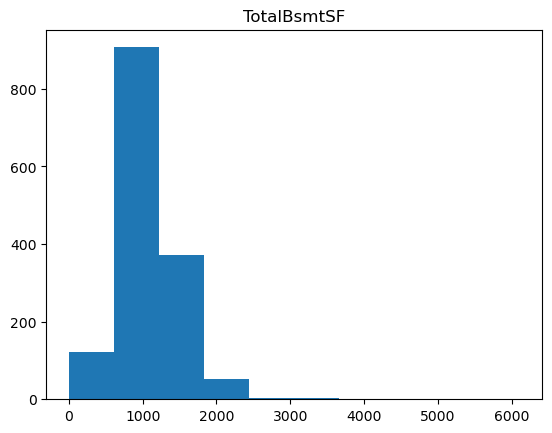

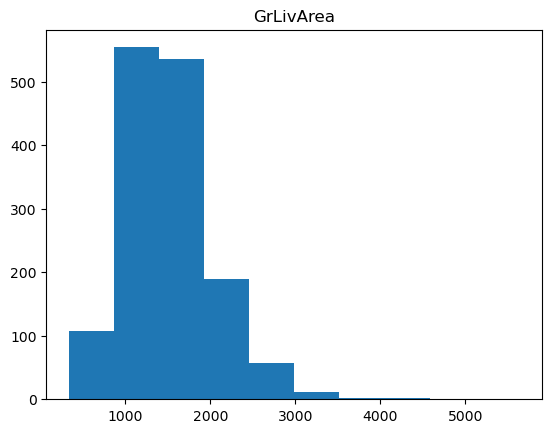

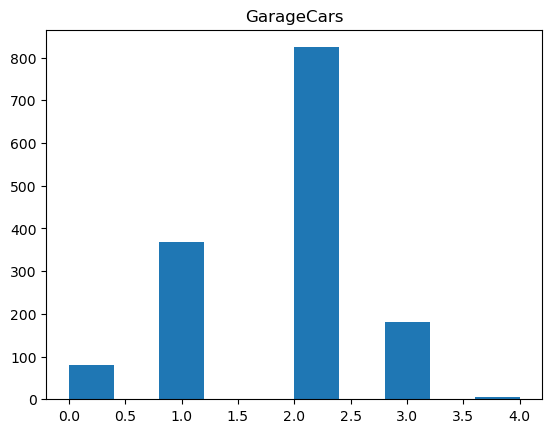

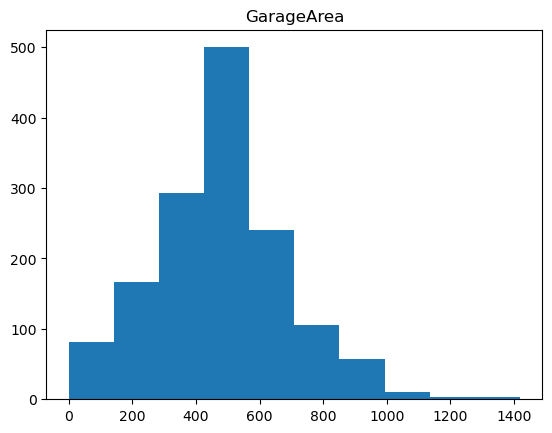

In [542]:
# 1c
# histograms to visualise feature distributions, matplot's default setting is "auto"  -
# - which selects the mest method for binning based on the data provided 
plt.hist(data['OverallQual'], label='OverallQual')
plt.title('OverallQual')
plt.show()
plt.hist(data['TotalBsmtSF'], label='TotalBsmtSF')
plt.title('TotalBsmtSF')
plt.show()
plt.hist(data['GrLivArea'], label='GrLivArea')
plt.title('GrLivArea')
plt.show()
plt.hist(data['GarageCars'], label='GarageCars')
plt.title('GarageCars')
plt.show()
plt.hist(data['GarageArea'], label='GarageArea')
plt.title('GarageArea')
plt.show()

In [543]:
from scipy import stats
#1c
#getting skewness values for top 5 correlated numeric features, will use to compare and comment on distribution skews 
print("Skewness values: ")
print(stats.skew(data['OverallQual']))
print(stats.skew(data['TotalBsmtSF']))
print(stats.skew(data['GrLivArea']))
print(stats.skew(data['GarageCars']))
print(stats.skew(data['GarageArea']))

Skewness values: 
0.2167209765258641
1.522688086978629
1.365155954773434
-0.34219689543081294
0.1797959420587727


In [544]:
#1c
#getting kurtosis values for top 5 correlated numeric features, will use to comment on distribution's 'flatness' or 'sharpness'in comparison to normal dists
print("Kurtosis values: ")
print(stats.kurtosis(data['OverallQual']))
print(stats.kurtosis(data['TotalBsmtSF']))
print(stats.kurtosis(data['GrLivArea']))
print(stats.kurtosis(data['GarageCars']))
print(stats.kurtosis(data['GarageArea']))

Kurtosis values: 
0.091856548449611
13.201041630635025
4.874265760253215
0.2161348715110729
0.9098227950882034


In [545]:
#1d missing values
# checking missing values
missing_values = data.isnull().sum()
missing_counts = missing_values[missing_values > 0]
missing_counts_sorted = missing_counts.sort_values(ascending=True)
missing_counts_sorted

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [546]:
#missing percentages for the missing value counts above, dividing 
missing_percentage = (missing_counts / data.shape[0]) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
missing_percentage_sorted

Electrical       0.068493
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

- Fence, Alley, MiscFeature and PoolQC have the highest percentages of null values.
- This makes sense given that Pools are not common household features.
- MiscFeature seems ambiguous and has only ever had data entered 54 times.
- Fence null values mean that the house does not have a fence. We will need to handle these before modelling.
- For the other null features, imputation will likely be the solution. 

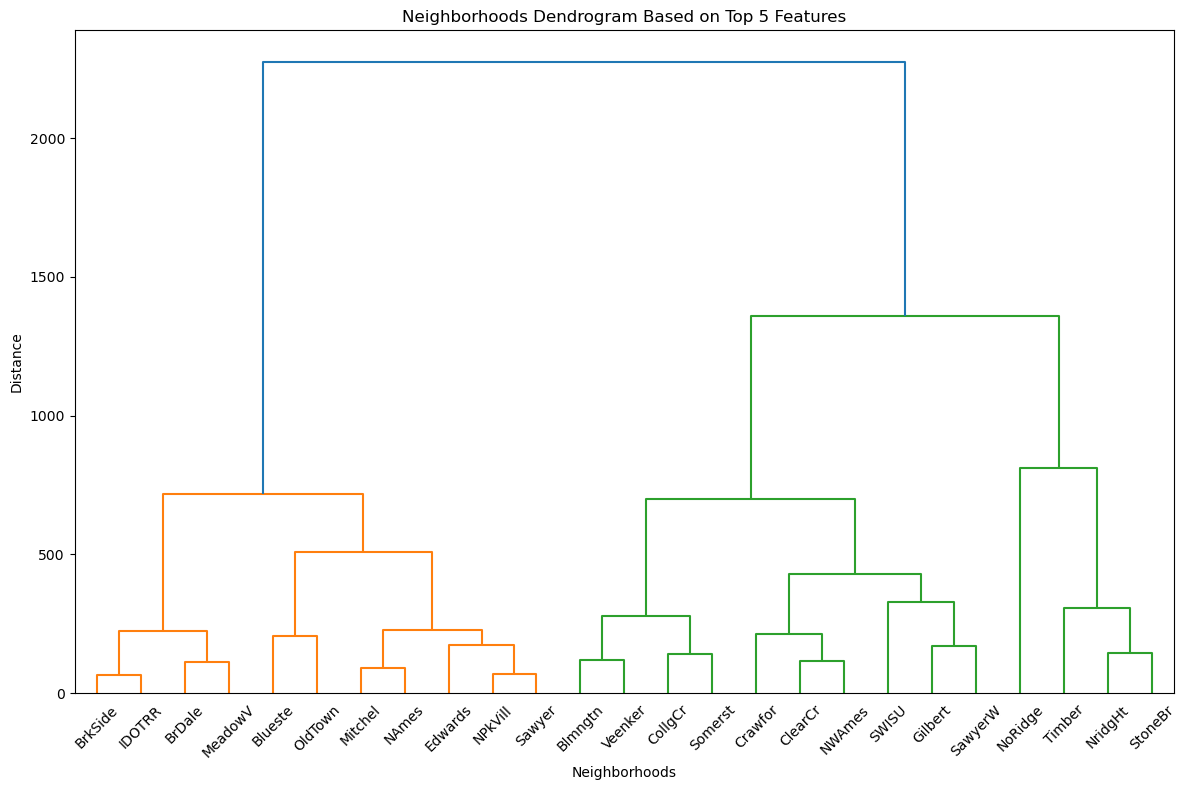

In [548]:
#FURTHER EDA - QUESTION 3
# NOTE: I found this question difficult to interpret, but considering that the main goal is to view if house price clusters are -
# - located in similar neighborhoods, I used clustering on the top 5 features and then plotted dendrogram based on the neighborhood data -
# - didnt use this in my final report, but used it more so for my own reasons
# specifying top 5 features
top_5 = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

# grouping by neighborhood and getting the mean for these features
grouped_neighborhoods = data.groupby('Neighborhood')[top_5].mean()

#  hierarchical clustering on the grouped neighborhood data
linkage_matrix = linkage(grouped_neighborhoods.values, method='ward')

# plotting the dendrogram for the neighborhoods
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=grouped_neighborhoods.index, orientation='top')
plt.title('Neighborhoods Dendrogram Based on Top 5 Features')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


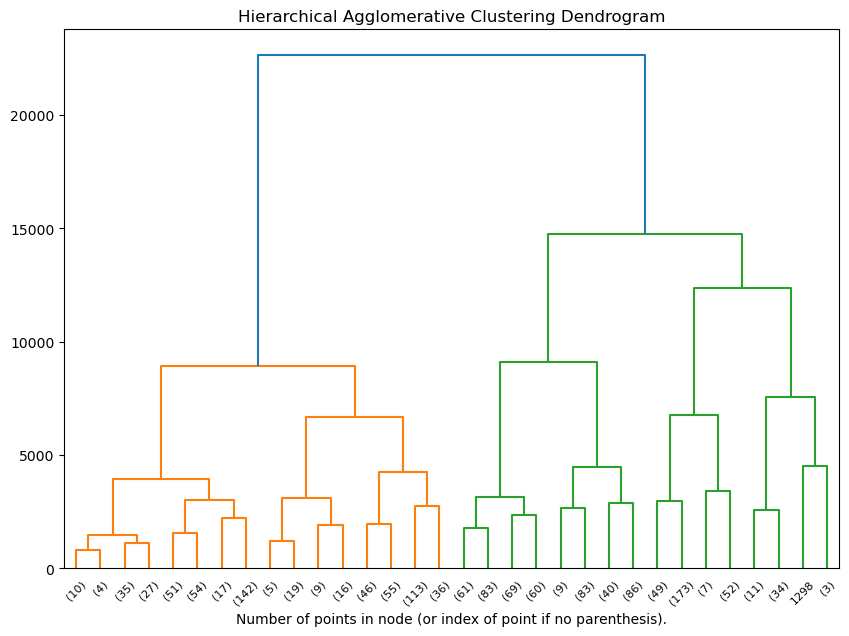

In [551]:
# essentially did a similar thing here, but used tthe code from Week's 3 tutorial and the x axis is the number of points in a node
from sklearn.cluster import AgglomerativeClustering

#  top 5 features
X = data[['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']].dropna()

# hierarchical agglomerative clustering
agg_clusters = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

# fucntion to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # creating linkage matrix and then plotting the dendrogram

    # counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # plotting the result 
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Agglomerative Clustering Dendrogram")
plot_dendrogram(agg_clusters, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [555]:
#FireplaceQu represents the quality of fireplaces and has 690 missing values, meaning it has 770 non-null.
#Fireplaces column has no null values, I assume that houses with '0' values will also be around 690
#if my assumption is correct then we can fill null values in FireplaceQu with 'No fireplace'
unique_fireplaces = data['Fireplaces'].unique()
print(unique_fireplaces)
num_zero_fireplaces = (data['Fireplaces'] == 0).sum()

num_zero_fireplaces

[0 1 2 3]


690

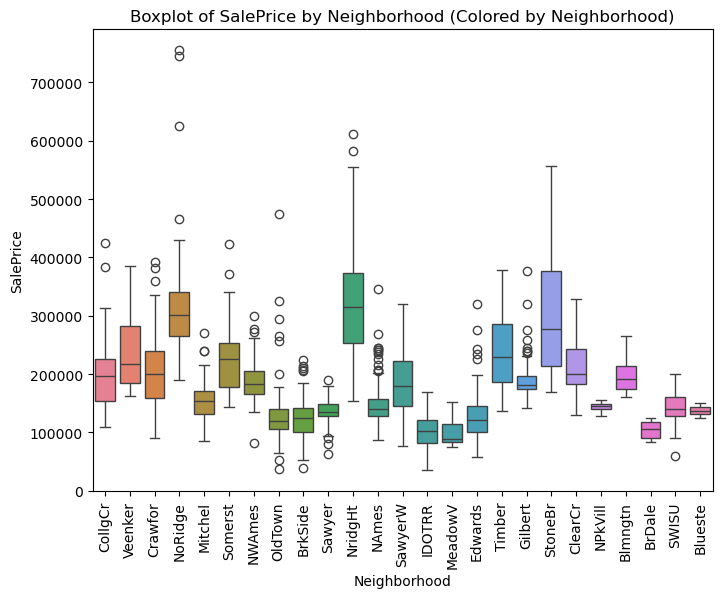

In [556]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', hue='Neighborhood', data=data, palette="husl", dodge=False)
plt.xticks(rotation=90)
plt.title('Boxplot of SalePrice by Neighborhood (Colored by Neighborhood)')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

- Lots of variation in spreads here, most expensive houses seem to be within NoRidge(albeit a few outliers), NridgHt and StoneBr, these neighbourhoods also appear to have the largest speads of house price.
- Neighborhoods with the lowest price ranges are OldTown and BrkSide.
- NPkVill has a very small spread. There are several outliers, but that is to be expected in cases of larger area/quality etc.
- Overall, evidence suggests house prices do vary across neighbourhoods.

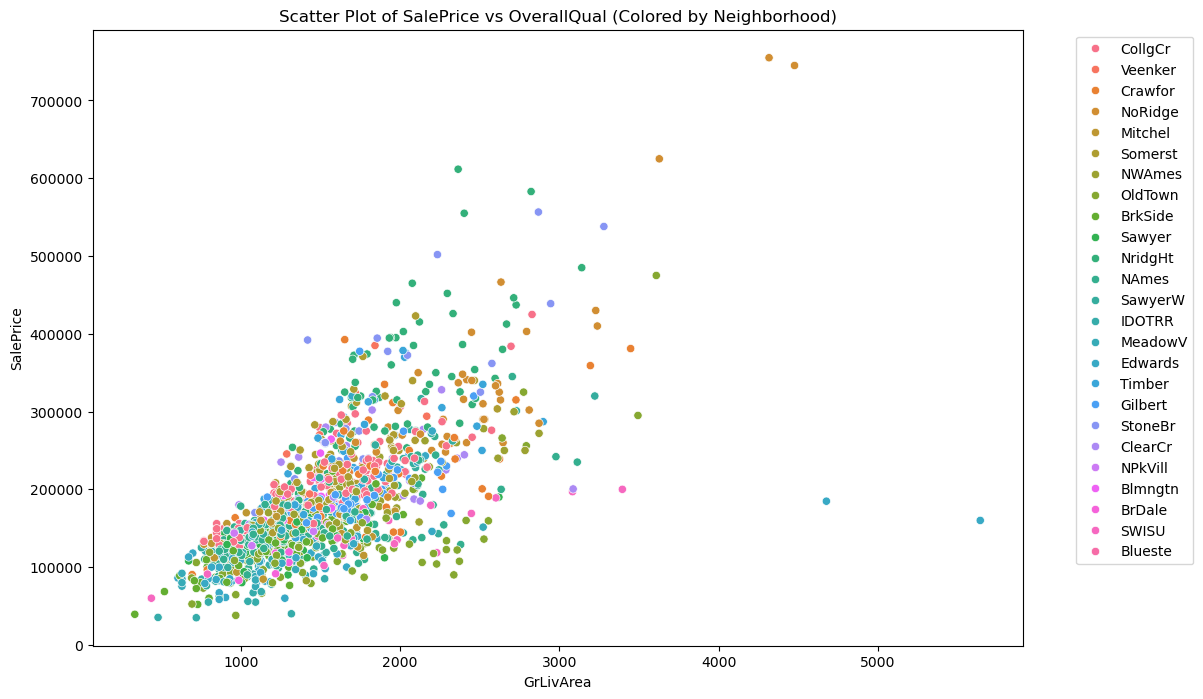

In [559]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Neighborhood', palette='husl', data=data)
plt.title('Scatter Plot of SalePrice vs OverallQual (Colored by Neighborhood)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Visualising grlivarea as a highl correlated numeric value of sale price, to see if colours(neighbourhoods) are spread out
- It's hard to tell for sure, but points that are on the higher end of the y axis are green and purple and if we compare to the box plots above it's safe to assume this is NridgHt and StoneBr


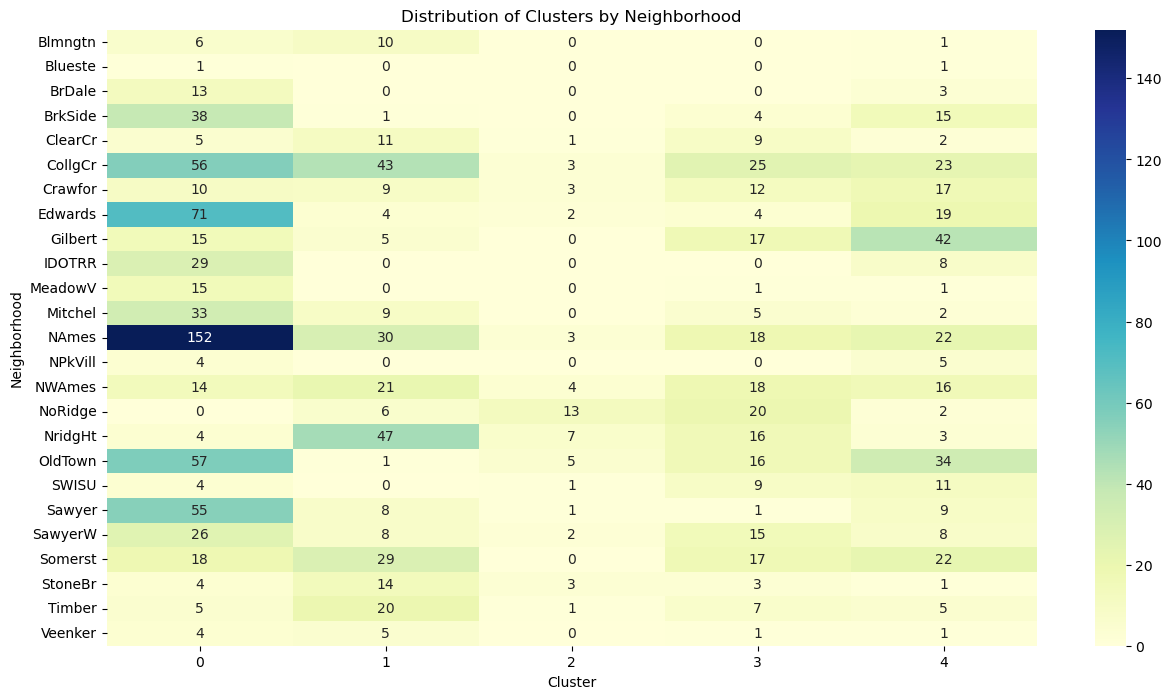

In [563]:
## https://seaborn.pydata.org/generated/seaborn.clustermap.html
clusteringg_data = data[top_5].dropna()
dataa = pd.read_csv(file_path)
# Perform Agglomerative Clustering to assign clusters
clusteringg_model = AgglomerativeClustering(n_clusters=5)
clusterr_labels = clusteringg_model.fit_predict(clusteringg_data)

# adding cluster labels to the original dataset
dataa['Cluster'] = pd.Series(clusterr_labels, index=clusteringg_data.index)

# new df for neighborhoods and clusters
neighborhood_clusterr = dataa[['Neighborhood', 'Cluster', 'SalePrice']].dropna()

# Count the number of houses per neighborhood for each cluster
clusterr_distribution = neighborhood_clusterr.groupby(['Neighborhood', 'Cluster']).size().unstack(fill_value=0)

# plotting a heatmap to visalise distribution of clusters by neighborhood
plt.figure(figsize=(15, 8))
sns.heatmap(clusterr_distribution, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribution of Clusters by Neighborhood')
plt.xlabel('Cluster')
plt.ylabel('Neighborhood')
plt.show()

The heatmap shows diverse patterns of cluster distribution across neighbourhoods. Cluster 0 stands out as the most colourful, indicating a broad distribution across multiple neighborhoods and suggesting that houses within this cluster have a wider range of prices and characteristics. Clusters 1 and 4 are also quite colourful, showing notable variation in house features and prices across different neighborhoods. It is interesting that, Cluster 2 appears to be more uniform in colour, implying that the houses grouped here are more similar in features and prices, likely concentrated in fewer neighborhoods. Cluster 3 shows some variation but is less colourful compared to clusters 0, 1, and 4, suggesting moderate diversity in house characteristics within this group. This colour variation across clusters reinforces the idea that certain clusters, particularly 0, 1, and 4, represent more diverse housing characteristics and price ranges across neighbourhoods, while others like Cluster 2 are more homogenous.


In [568]:
##References:
#https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/ 
#https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python
#https://seaborn.pydata.org/index.html -> used the whole site really, lots of helpful things about labels, legends, size, etc
## https://seaborn.pydata.org/generated/seaborn.clustermap.html


Statement on Use of AI tools: During this assignment I used ChatGPT to help me make prettier plots, troubleshoot my python code errors and to improve my academic writing in the report. 